# MultiActor_DeepDeterminnisticPolicyGradient Report
### Two Agents acting on each other in a game of tennis

# Project Background
In the real world it typically takes multiple people to accomplish a certain task, likewise AI systems in the future (and the present) will need to be able to work cooperatively with other agents, including AIs and their human counterparts.  This project demonstrates a small step towards that end goal by placing multiple instances of a single agent into an environment where they must compete with one another.

Throughout this project, former work done in the deep deterministic policy gradient space was highly leveraged and served as the primary backbone of this code (see ddpg.py).  Leveraging the ddpg framework, the goal of this particular project was to keep the ball live as long as possible and scoring in this environment reflected that overall goal.  

# Goals
Project scores were determined based on consecutive hits by each agent.   Once an agent successfully returned the ping pong ball the agent would then receive an award of +0.1 points.  However, if an agent missed the ball / hit the ball out of bounds it would then receive -0.01 points instead.  Final scores for each episode was then calculated based on the maximum score by a single agent. The model was trained for a total of 5,000 episode where it achieved a benchmark score 100 episode moving averaging +0.5 pts after 2,337 episodes.

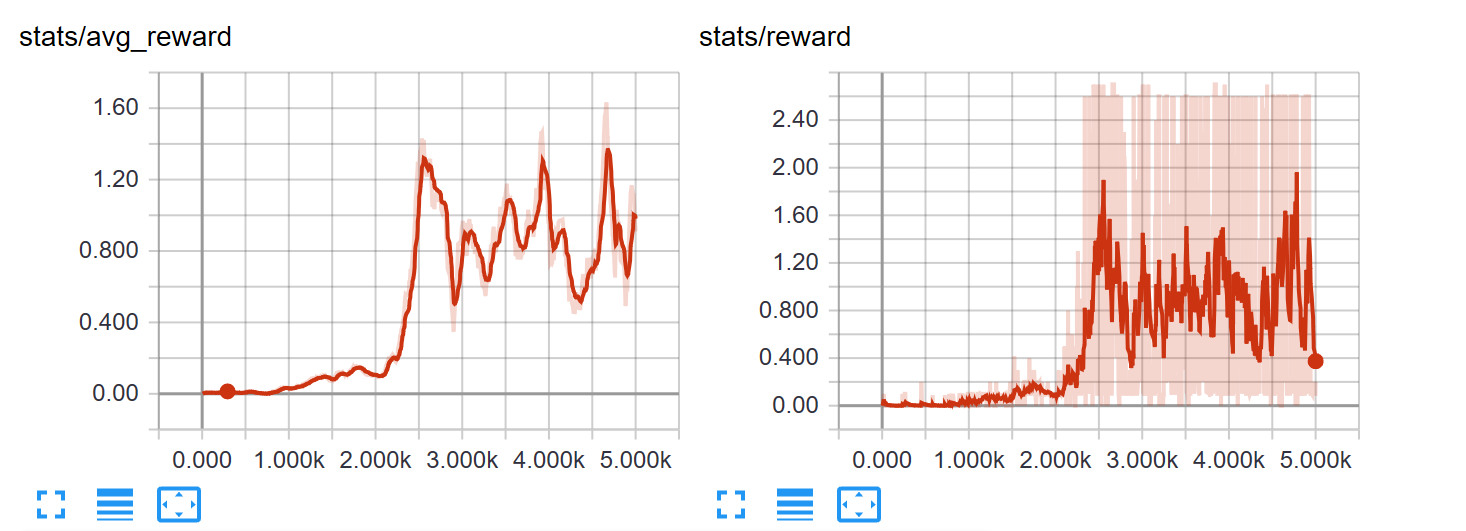

# Multi Agent Deep Deterministic Policy Gradient Explained:
This actor-critic implementation utilizes deep reinforcement learning known as Deep Deterministic Policy Gradient (DDPG) to evaluate a continuous action space. DDPG is based on the papers ‘Deterministic Policy Gradient Algorithms’ published in 2014 by David Silver and ‘Continuous Control with Deep Reinforcement Learning’ published by Tomothy P. Lillicrap in 2015.  To continue exploration of DDPG, and inspired by “Multi Agent Actor Critic for Mixed Cooperative Competitive environments “ by OpenAI, the functionality of the original DDPG algorithm was able to be enhanced by creating multiple instances of the same agent within the 'Tennis' environment allowing the agents to learn to competitively cooperate with one-another while playing a game of table tennis.

Unlike other actor-critic methods that rely on stochastic distributions to return probabilities across a discreet action space, DDPG utilizes a deterministic policy to directly estimate a set of continuous actions based on the environment’s current state. As a result, DDPG is able to take advantage of Q values (much like DQN) which allows the estimation of rewards by maximizing Q via a feed-forward Critic network. The actor feed-forward network then is able to use the critic’s value estimates to choose the action that maximizes Q via back-propagation (stochastic gradient decent of the deterministic policy gradient allows optimizing for Q by minimizing MSE).

Like DQN, and DDPG, Multi Agent DDPG requires the agents to explore the environment in-order to determine an optimal policy – this is accomplished by adding noise via the Ornstein-Uhlenbeck process (ON) to explore the environment. However, unlike typical DDPG algorithms, learning is completed across multiple agents competing against one-another within the tennis environment across a single replaybuffer.

Interestingly, after maxing out after 2.5K episodes with a 100 episode MA score at 1.35, the model then varied lower, but after 1.4K additional episodes (3.9K)  it reached a new high of 1.406 displaying an upward trending score for the remaining episodes and then finally peaking  at 1.55 after 4,670 episodes.

Next steps include implementing a prioritized replay buffer or implementing a d4pg agent instead of ddpg.  Furthermore, it would be interesting to test whether or not the current model would continue to improve with additional episodes post-5,000  continuing the upward trend demonstrated in the first 5,000 episodes.

# Hyperparameters used for training include the following:

In [2]:
        buffer_size = int(1e5)
        gamma = 0.99
        epsilon = 1.0
        epsilon_decay = 1e-5
        batch_size = 256
        tau = 1e-3
        lr_act = 1e-3
        lr_critic = 1e-4
        weight_decay = 1e-8
        
        # Add OU Noise to actions
        mu = 0
        theta = 0.15
        sigma = 0.2
        noise_start = 1.0

# Additional parameters used during training were:

In [3]:
        n_episodes = 5000
        max_t = 1000
        print_every = 50
        update_frequency = 1
        seed_num = 47
        add_noise = True

# Further Notes around Hyperparameters:
Hyperparameters of note included high values of epsilon with decay to encourage exploration of the action space during the beginning of training (by acting on the absolute amount of OU Noise).  Furthermore, another key variable was around the value tau.  During training tau was used to describe how much of a network's weights are updated/retained from the previous episode.  At each step the target networks retain 1-tau of their current parameter values and gain tau of the trained network parameter values (in many ways larger values of tau encourage less exploration of new strategies).